### Agenda
1. Homework 2: [Kaggle Competition](https://docs.google.com/document/d/1ctW62_-hncYeahdhdQRBqAwauI10O1gVcqKX1b1KZs4/edit?usp=sharing)
2. Some Public Datasets: [Google dataset search](https://toolbox.google.com/datasetsearch), [NYC Open Data](https://data.cityofnewyork.us/browse), [Data.gov](https://catalog.data.gov/dataset), [UN Data](http://data.un.org/), [Quandle](https://www.quandl.com/), [MovieLens](https://grouplens.org/datasets/movielens/), [Quora's meta list of datasets](https://www.quora.com/Data/Where-can-I-find-large-datasets-open-to-the-public)
3. SKlearn
    1. Dimensionality Reduction: PCA 
    2. Clustering: K-means (DS4biz p.169 - 173)

### 3 (A): Dimensionality Reduction with PCA
[SKlearn PCA Documents](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) <br>
[Learn more about the seedsdataset](https://archive.ics.uci.edu/ml/index.php)

In [38]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [39]:
# Load seedsdataset.csv 
df = pd.read_csv('seedsdataset.csv')
df.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,wheat_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [40]:
#turn dataframe into Numpy Array with shape (n_samples, n_features)
df_ft = df.drop('wheat_variety', axis = 1) #axis = 1 means youre dropping column
df_ft.head()

X = df_ft.values #turned it into np array
X
#type(X)

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [41]:
#load sklearn pca, reduce dimension from 7 to 3                       ##REVIEW PCA! WHATS THIS FOR???
pca = PCA(n_components = 3)

#project
X_proj = pca.fit_transform(X)
#pca.fit(X) #pca.transform(x)

#check shape
X_proj.shape

(210, 3)

In [42]:
#check explained variance by each principal directions
pca.explained_variance_ratio_ #first 2 directions contains most of info in dataset

array([0.8293852 , 0.16363245, 0.00565791])

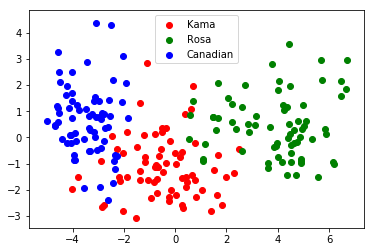

In [43]:
#plot 
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue']
cls = ['Kama', 'Rosa', 'Canadian']

for i in range(len(cls)):
    ix = np.where(df['wheat_variety'].values == i + 1)
    plt.scatter(X_proj[ix, 0], X_proj[ix, 1], c = colors[i] , label = cls[i])
plt.legend()

plt.show()

### 3 (B): Clustering with K-means 
[SKlearn K-means Documents](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html)


In [44]:
from sklearn import metrics
from sklearn.cluster import KMeans

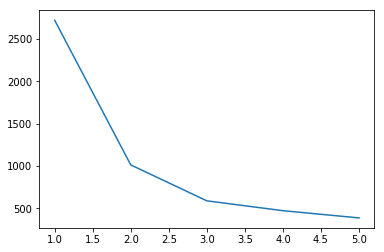

In [45]:
#reduce your dimensions to smaller! using pca, curse of dimensionality dude. Do pca or tsnee on your data to reduce it 
#to a range before k-means
#--------------------------
#decide number of clusters by inertia (the 'elbow' method)
#inertia: sum of squared distances to the closest centroid for all observations in the training set



num_cluster = []
inertia = []
for i in range(1,6):
    clf = KMeans(init = 'k-means++', n_clusters = i, n_init = 10) #experiment with # clusters you want to find best, how many initializations you wanna run? of alg
    clf.fit(X)
    num_cluster.append(i)
    inertia.append(clf.inertia_)

#plot
plt.plot(num_cluster, inertia)
#plt.x_axis

#after 3 there isnt much difference between 3,4 and 5 clusters so we'll pick 3
#the more clusters not the better because it may complicate stuff, find the nook of the elbow!

In [46]:
chosen_cluster = 3
clf = KMeans(init='k-means++', n_clusters = chosen_cluster, n_init=10)
clf.fit(X)
clf.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [47]:
#position of the centroids
centroids = clf.cluster_centers_
centroids

#plugging into 2D graph so I want to project into 2D

array([[11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

Text(0.5, 1.0, 'K-means clustering; centroids are black crosses.')

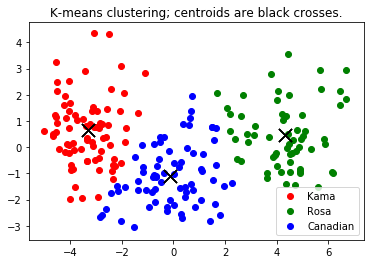

In [48]:
#plot k-means clustering results

## centroids
centroids = clf.cluster_centers_
centroids_proj = pca.transform(centroids)

## scatter plot
colors = ['red', 'green', 'blue']
cls = ['Kama', 'Rosa', 'Canadian']

for i in range(len(cls)):
    ix = np.where(clf.labels_ == i)
    plt.scatter(X_proj[ix, 0], X_proj[ix, 1], c = colors[i] , label = cls[i])
    plt.scatter(centroids_proj[:, 0], centroids_proj[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)

plt.legend()
plt.title('K-means clustering; centroids are black crosses.')

In [49]:
# the above is different from previous in that the clusters are grouped within themselves more closely, the X's are
# the centroids, also blue and red are swapped?